### Import Modules

In [ ]:
from jax import grad, vmap, numpy as jnp

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### The Demand Function (Demand for Coffee)

\begin{align}
Q = D(p, p_s, Y)
\end{align}


*   What assumptions are we making when we specify that the Demand for coffee is a function the price of coffee, the price of sugar and income ($Y$)?

    *   <font color='grey'> We're explicitly assuming that anything else that can/does affect demand is held constant. </font>
    *   <font color='grey'>For instance, if we think that the season affects demand (like people demand more coffee in the fall than the summer), then the predictions of this model may be wrong if we don't include season as an argument to the function.</font>




### <font color='blue'>Consider</font>: Estimating the Demand for Coffee 

The textbook provides us with an estimated world demand function for green (unroasted) coffee beans. 

\begin{align}
Q = 8.65 - p - 0.3p_s + 0.1Y
\end{align}

*   What assumptions are we making by specifying this functional form?/ Why do we make these assumptions?

    *   <font color='grey'> We are assuming that Demand is a linear function of price, price of sugar and income. We do so because it is (1) a highly interpretable model and (2) computationally very easy </font>

*   If we are primarily interested in the relationship between price and quantity, can we relax the functional form assumption (i.e assume a partially linear form)? What tradeoffs are we introducing by doing this?

    *   <font color='grey'> We can certainly relax the functional form assumption. </font>
    *   <font color='grey'> We will potentially explore these tradeoffs in greater detail at the end of the semeter. </font>

\begin{align}
Q = \beta_0 - \beta_1 p - g_0(p_s, Y)
\end{align}

### Visuallizing the Demand Function for Coffee

*   If we know the price of sugar and income, then we can re-write the above function as simply a function of price

\begin{align}
Q &= 8.65 - p - 0.3p_s + 0.1Y \\
&= 8.65 - p - (0.3 * 0.2) + (0.1 * 35) \\
&= 12-p
\end{align}

*   The downward curvature reflects the law of demand: Consumers demand more of a good the lower its price, holding constant tastes, the prices of other goods, and other factors that influence the amount they consumer


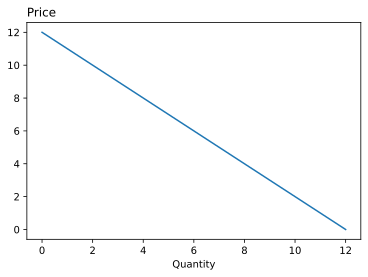

In [ ]:
p = jnp.linspace(0, 12, 1000)

def Q(p):
  return 12 - p
q = vmap(Q)(p)
plt.plot(q, p)
plt.title('Price', loc='left')
plt.xlabel('Quantity')
plt.show()

### How does quantity demand change as we change the price? 
One way to think about this is to look at the derivative of the demand function:

\begin{align}
\frac{dQ}{dp} 
\end{align}


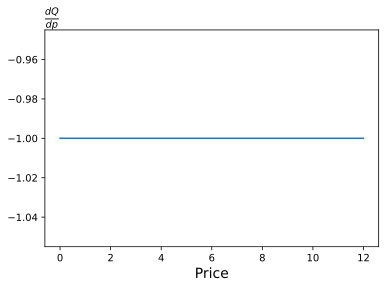

In [ ]:
Q_ = vmap(grad(Q))(p)

plt.plot(p, Q_)
plt.title(r'$\frac{dQ}{dp}$', loc='left', size=14)
plt.xlabel('Price', size=14)
plt.show()

### Nonlinear Demand Curve

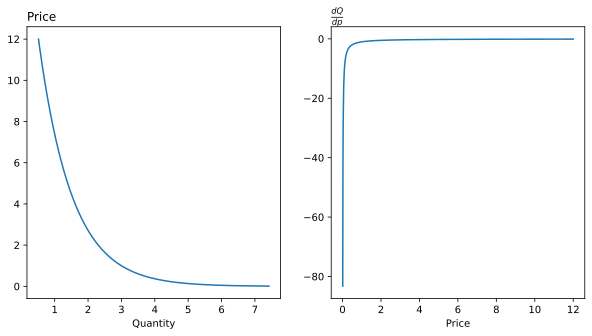

In [ ]:
def Q_nonlinear(p):
  return -jnp.log(p) + 3

q = vmap(Q_nonlinear)(p)
q_grad = vmap(grad(Q_nonlinear))(p)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].plot(q, p, label='Demand Curve')
ax[0].set_title('Price', loc='left')
ax[0].set_xlabel('Quantity')

ax[1].plot(p, q_grad, label='Demand Curve')
ax[1].set_title(r'$\frac{dQ}{dp}$', loc='left')
ax[1].set_xlabel('Price')

plt.show()

### Shifts

But for our general purposes, we don't need to think of demand only as a function of price. We can express it in terms of the full set of arguments

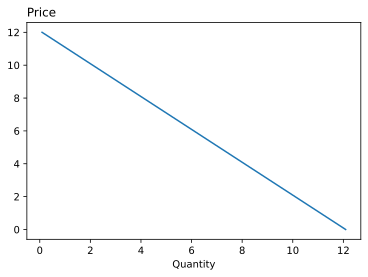

In [ ]:
def Q(p, ps, Y):
  return 8.65 -p - 0.3*ps + 0.1*Y

q = vmap(Q, in_axes=(0, None, None))(p, 0.2, 35)
plt.plot(q, p)
plt.title('Price', loc='left')
plt.xlabel('Quantity')
plt.show()

This enables us to understnad how the quantity demanded changes when we change income 

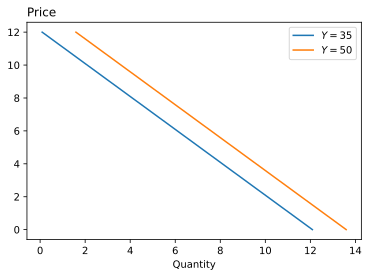

In [ ]:
def Q(p, ps, Y):
  return 8.65 -p - 0.3*ps + 0.1*Y
ys = jnp.array([35, 50])
q = vmap(vmap(Q, in_axes=(0, None, None)), in_axes=(None, None,0), out_axes=(1))(p, 0.2, ys)

plt.plot(q[:, 0], p, label=r'$Y=35$')
plt.plot(q[:, 1], p, label=r'$Y=50$')
plt.title('Price', loc='left')
plt.xlabel('Quantity')
plt.legend()
plt.show()

We can even find the derivative of demand function with respect to income

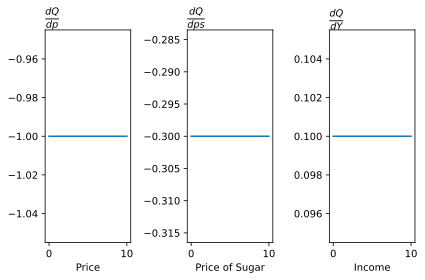

In [ ]:
dQdp = vmap(grad(Q, argnums=(0)), in_axes=(0, None, None))(jnp.linspace(0, 10, 100), 1., 1.)
dQdps = vmap(grad(Q, argnums=(1)), in_axes=(None, 0, None))(1.,jnp.linspace(0, 10, 100), 1.)
dQdY = vmap(grad(Q, argnums=(2)), in_axes=(None, None, 0))(1., 1., jnp.linspace(0, 10, 100))

fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, tight_layout=True)
ax[0].plot(jnp.linspace(0, 10, 100), dQdp)
ax[1].plot(jnp.linspace(0, 10, 100), dQdps)
ax[2].plot(jnp.linspace(0, 10, 100), dQdY)
ax[0].set_title(r'$\frac{dQ}{dp}$', loc='left', size=14)
ax[0].set_xlabel('Price')
ax[1].set_title(r'$\frac{dQ}{dps}$', loc='left', size=14)
ax[1].set_xlabel('Price of Sugar')
ax[2].set_title(r'$\frac{dQ}{dY}$', loc='left', size=14)
ax[2].set_xlabel('Income')
plt.show()
